> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Understanding US gun ownership trends

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: The objective of this project is to understand gun ownership patterns in the United States. The objective is to answer the following key questions:

1. What census data is most associated with high gun per capita? 
2. Which states have had the highest growth in gun registrations? 
3. Is gun ownership correlated with certain economic factors?
4. What is the gun ownership trends over time?


In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: I have loaded the following files in CSV format 1. gun-data.csv and 'u.s. - census-data.csv'.
To begin with, I have reduced the number of columns in the first file by eleminating columns that I consider to be less relvant to my questions. I have taken out data on permit check, rentals and returns.

I then wrangled data on the US census. The first step was to select rows of data that is relevant to my project.  

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df_gun_data = pd.read_csv('gun-data.csv')
df_census_data = pd.read_csv('u.s.-census-data.csv')

df_gun_data.head()


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [5]:
# Here I want to check the structure of the census data and to plan what I would need to wrongle to make it usable
df_census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [6]:
# converting the month data to month and year to year in a separate column. This would allow me to analyse time trends
df_gun_data['month_1'] = pd.to_datetime(df_gun_data['month'], format="%Y-%m").dt.month 
df_gun_data['year'] = pd.to_datetime(df_gun_data['month'], format="%Y-%m").dt.year


In [7]:
# Creating a subset of data that I would like to anlyse, as I would like to focus on the variable that I consider intuitively relevant
df = df_gun_data[['state', 'year', 'totals']]
df.head()


,state,year,totals
0,Alabama,2017,32019
1,Alaska,2017,6303
2,Arizona,2017,28394
3,Arkansas,2017,17747
4,California,2017,123506


In [8]:
# Creating a Pivot Table to arrange a time series of total gun data by state by year, I will be ignoring the gun and permit type data, rather relying only on the aggregates
#df_grouped = df.groupby(['state', 'year'])['totals'].sum()
df_pivot = pd.pivot_table(df, values = 'totals', index = ['state'], columns =['year'], aggfunc = np.sum) 
df_pivot.head()

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
state,,,,,,,,,,,,,,,,,,,,
Alabama,36568,246756,221911,230187,221008,225479,229997,235873,243176,245355,299432,317868,308607,336102,431356,563880,621305,737509,616947,336763
Alaska,3985,43073,39959,39959,36793,37059,40504,44514,47037,49604,61729,60780,65909,70198,85342,93405,87623,85621,87647,56902
Arizona,17453,173548,148263,147582,142260,145719,155719,176649,204178,192071,208721,215379,206050,251477,339663,363036,310672,331442,416279,279553
Arkansas,21752,184616,169628,166062,153424,150249,158366,164001,170129,169824,191799,209842,191448,206228,246193,279736,234282,257346,266014,161694
California,67445,883144,794506,854569,684390,524431,548843,611022,617820,855943,780398,788164,816399,905701,1132603,1368295,1474616,1761079,2377167,1167528


In [9]:
# Obtained some summary stats to see what is going on with the data. Checking some summary stats to build intuition
df_pivot.describe()

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,16216.327273,164431.763636,153219.927273,160364.454545,152128.527273,152768.072727,155998.018182,161219.181818,181691.945455,2.029504e+05,2.307815e+05,2.542719e+05,2.603725e+05,2.970315e+05,3.538879e+05,3.812128e+05,3.792771e+05,4.186598e+05,4.986457e+05,3.271005e+05
std,16985.405699,175487.801422,160129.635929,168711.649366,154450.310127,147168.108834,150908.997061,155780.903318,182058.794343,2.610586e+05,2.992318e+05,3.404298e+05,3.609865e+05,3.774685e+05,4.325074e+05,3.936658e+05,4.688436e+05,5.513130e+05,6.691289e+05,5.140981e+05
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,26.000000,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,1.300000e+01,1.200000e+01,1.800000e+01,1.700000e+01,1.060000e+02
25%,3640.500000,38156.000000,40039.500000,42631.000000,43800.000000,46220.500000,49379.500000,49245.500000,51948.000000,5.166050e+04,5.915900e+04,6.086750e+04,6.453000e+04,6.992600e+04,8.715350e+04,9.508250e+04,8.564100e+04,9.238900e+04,1.117515e+05,6.861700e+04
50%,12002.000000,133674.000000,128258.000000,132781.000000,121976.000000,131395.000000,124153.000000,133667.000000,137925.000000,1.501330e+05,1.798870e+05,1.850430e+05,1.795950e+05,1.860680e+05,2.309990e+05,2.743020e+05,2.342820e+05,2.548140e+05,2.761610e+05,1.616940e+05
75%,24430.000000,207595.000000,190043.000000,197825.500000,192915.500000,208390.500000,211189.000000,220642.000000,241019.000000,2.435480e+05,2.841700e+05,3.157545e+05,3.324420e+05,3.582375e+05,4.571570e+05,5.268295e+05,4.816185e+05,5.107620e+05,6.072150e+05,3.739870e+05
max,82399.000000,883144.000000,794506.000000,854569.000000,684390.000000,688275.000000,672995.000000,738793.000000,791599.000000,1.587850e+06,1.881101e+06,2.189578e+06,2.385579e+06,2.280832e+06,2.589358e+06,1.633278e+06,2.492184e+06,3.218371e+06,3.676847e+06,3.417976e+06


(Text(0,0.5,'CAGR'), <matplotlib.lines.Line2D at 0x7f651e791208>)

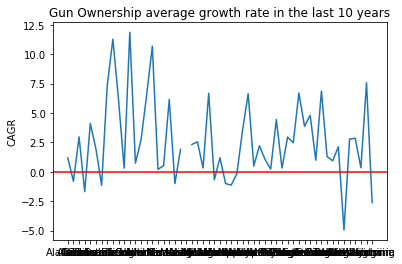

In [10]:
# Here I try to get an average growth rate over 10 years, per state. Except a few states most states have experience a positive growth rate in gun ownership
df_pivot['CAGR'] = ((df_pivot[2017]/df_pivot[2008])**(1/10) -1)*100
avg_growth_rate = df_pivot['CAGR'].mean()
plt.plot(df_pivot['CAGR'])
plt.title('Gun Ownership average growth rate in the last 10 years')
plt.ylabel('CAGR'), plt.axhline(y = 0, color = 'red')

In [25]:
"""The Chart Above shows the CAGR for the last 10 years for all states. The CAGR for most states are posistive and 
varies widely by state"""

'The Chart Above shows the CAGR for the last 10 years for all states. The CAGR for most states are posistive and \nvaries widely by state'

Text(0,0.5,'Total Number of Guns')

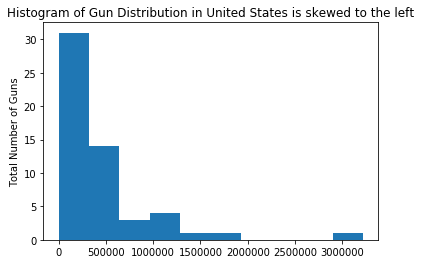

In [11]:
# Then I plot a histogram to see the distribution of states. There are some states that are outliers where gun ownerhsip is really high. This could be due to population, income lever and other factors.
plt.hist(df_pivot[2015])
plt.title('Histogram of Gun Distribution in United States is skewed to the left')
plt.ylabel('Total Number of Guns')


In [26]:
""" The Chart above shows total gun ownership per state. Most States have gun ownership of less than 500K. However, there are outliers with 3M guns"""

' The Chart above shows total gun ownership per state. Most States have gun ownership of less than 500K. However, there are outliers with 3M guns'

In [12]:
# Here I try to transpose the data to bring rows into columns. this will allow me to merge the two datasets
df_census_data_revised=df_census_data.T

In [13]:
# Here is obtain the total list of columns to select which ones I am interested in.
df_census_data_revised.ix['Fact'].values.tolist()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


['Population estimates, July 1, 2016,  (V2016)',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Population, Census, April 1, 2010',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, April 1, 2010',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, April 1, 2010',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent, April 1, 2010',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent, April 1, 2010',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Tw

In [14]:
# Here I remove the column index and replace it with column names and drop some rows that I do not need.
df_census_data_revised.index                                                 
df_census_data_revised.columns = df_census_data_revised.ix['Fact'].values.tolist()
df_census_data_revised.drop(['Fact', 'Fact Note'], inplace = True)
df_census_data_revised.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Here I create a subset of the census data that interets me and I give it a more crip column heading
df_cen_sub = df_census_data_revised[['Population estimates, July 1, 2016,  (V2016)', 'Median household income (in 2015 dollars), 2011-2015', 'Foreign born persons, percent, 2011-2015', 'Total employment, percent change, 2014-2015' ]]
df_cen_sub.columns = ['pop', 'income', 'aliens', 'employment']
df_cen_sub.head()

,pop,income,aliens,employment
Alabama,"4,863,300","$43,623",3.50%,1.90%
Alaska,"741,894","$72,515",7.40%,0.40%
Arizona,"6,931,071","$50,255",13.50%,2.40%
Arkansas,"2,988,248","$41,371",4.70%,1.10%
California,"39,250,017","$61,818",27.00%,3.50%


In [16]:
#Here I create a function to get the objects converted to float and eliminiate 1 instance of 'FN'

def str_int(x):
    if x!='FN':
        return  float(x.replace('$', '').replace(',', '').replace('%', ''))
    else:
        return np.NaN
    
df_cen_sub['pop'] = df_cen_sub['pop'].apply(str_int)
df_cen_sub['income'] = df_cen_sub['income'].apply(str_int)
df_cen_sub['aliens'] = df_cen_sub['aliens'].apply(str_int)
df_cen_sub['employment'] = df_cen_sub['employment'].apply(str_int)
df_cen_sub.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,pop,income,aliens,employment
Alabama,4863300.0,43623.0,3.5,1.9
Alaska,741894.0,72515.0,7.4,0.4
Arizona,6931071.0,50255.0,13.5,2.4
Arkansas,2988248.0,41371.0,4.7,1.1
California,39250017.0,61818.0,27.0,3.5


In [17]:
# Drop any na values
df_cen_sub.dropna()

,pop,income,aliens,employment
Alabama,4863300.0,43623.0,3.500,1.900
Alaska,741894.0,72515.0,7.400,0.400
Arizona,6931071.0,50255.0,13.500,2.400
Arkansas,2988248.0,41371.0,4.700,1.100
California,39250017.0,61818.0,27.000,3.500
Colorado,5540545.0,60629.0,9.800,3.300
Connecticut,3576452.0,70331.0,13.900,1.200
Delaware,952065.0,60509.0,8.700,1.500
Florida,20612439.0,47507.0,19.700,4.500
Georgia,10310371.0,49620.0,9.800,4.000


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [18]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# The census data had a number of issues. They are listed as follows:
# 1. The data needed to be transposed to get all the state names in rows.
# 2. The column headings needed to be created after transposing
# 3. The data types need to be made into a float so that numerical analysis can be done with them.
# 4. $,"," and "." points need to be to removed 
# 5. A new more shorter column headings need to be created

In [19]:
##### Here I combine the subset from gun data with the subset from the census data and reduce it further to a fewer columns
df_comb = df_pivot.join(df_cen_sub, lsuffix ='_df_pivot', rsuffix = '_df_cen_sub')
df_comb_sub = df_comb[[2015, 'pop', 'income', 'aliens', 'employment']] 
df_comb_sub.head()

,2015,pop,income,aliens,employment
state,,,,,
Alabama,737509,4863300.0,43623.0,3.5,1.9
Alaska,85621,741894.0,72515.0,7.4,0.4
Arizona,331442,6931071.0,50255.0,13.5,2.4
Arkansas,257346,2988248.0,41371.0,4.7,1.1
California,1761079,39250017.0,61818.0,27.0,3.5


In [20]:
df_comb_sub.dropna()
df_comb_sub.dtypes

2015            int64
pop           float64
income        float64
aliens        float64
employment    float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What census data is most associated with high gun per capita?

In [23]:
# I built a correlation matrix with some of the economic factors to see gun ownership relationships with other factors.
print('Correlation Matrix')
corr = df_comb_sub.corr()
corr.style.background_gradient()

# A few intersting points emerge:
#Gun Owership [2015] was 

#1. positively related to population with corrcoef of 0.57
#2. It is negatively correlated with income with coef of -0.22
#3. It is positively correlated with % of foreign born citizen in that state with a factor of 0.17 
#4. It is positively corrected with employment leves in that state by a factor of 0.29




Correlation Matrix


,2015,pop,income,aliens,employment
2015,1,0.571336,-0.223634,0.178462,0.297158
pop,0.571336,1,0.0612774,0.488928,0.277035
income,-0.223634,0.0612774,1,0.539054,0.0837884
aliens,0.178462,0.488928,0.539054,1,0.564273
employment,0.297158,0.277035,0.0837884,0.564273,1


In [27]:
""" The Correlation Matrix shows how two sets of data move/ change together. The above chart is the correlation matrix of gun ownership in 2015, Population, Median Income, % of Foreign born citizens and level of employment in the state"""

' The Correlation Matrix shows how two sets of data move/ change together. The above chart is the correlation matrix of gun ownership in 2015, Population, Median Income, % of Foreign born citizens and level of employment in the state'

Text(0,0.5,'Total Gun Ownership')

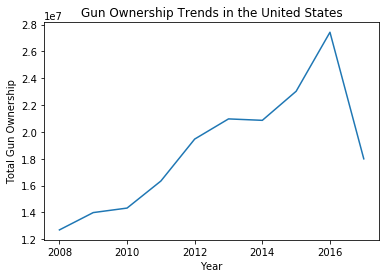

In [24]:
# plotted the time series chart of gun ownership trends over time - which shows that it is growing and has significantly increased sing 9/11 incident in New York
plt.plot(df_pivot[[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]].sum())
plt.title('Gun Ownership Trends in the United States')
plt.xlabel('Year')
plt.ylabel('Total Gun Ownership')

In [28]:
"""The chart above shows growth in gun ownership and the decline in the last two years. The gun ownership has grown from 12M in 2008 to over 27M by 2016 """

'The chart above shows growth in gun ownership and the decline in the last two years. The gun ownership has grown from 12M in 2008 to over 27M by 2016 '

Text(0,0.5,'popluation')

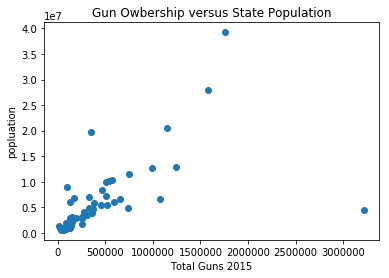

In [29]:
# Plot of gun ownership and population
plt.scatter(df_comb_sub[2015], df_comb_sub['pop'])
plt.xlabel('Total Guns 2015')
plt.title('Gun Owbership versus State Population')
plt.ylabel('popluation')

In [30]:
""" This chart shows a strong correlation between state population and gun ownership, as you would expect to see. There are some outliers, however, such as Kentucky to the very right."""

' This chart shows a strong correlation between state population and gun ownership, as you would expect to see. There are some outliers, however, such as Kentucky to the very right.'

Text(0.5,1,'Income Vs Gun Ownership')

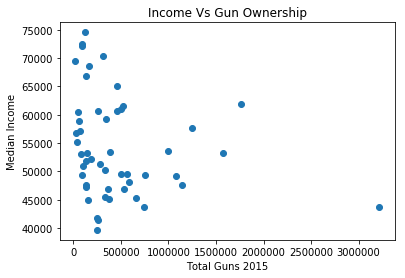

In [32]:
# Plot of gun ownership and income
plt.scatter(df_comb_sub[2015], df_comb_sub['income'])
plt.xlabel('Total Guns 2015')
plt.ylabel('Median Income')
plt.title('Income Vs Gun Ownership')

In [33]:
""" There seems to be a negative correlation between median income and gun wonership. However, the relationship seems to be week."""

' There seems to be a negative correlation between median income and gun wonership. However, the relationship seems to be week.'

### Which states have had the highest growth in gun registrations?

In [39]:
# Here I try to find high and low of per capital gun ownership
print('The table below shows the state with lowest per_capital gun ownership')
df_comb_sub['per_capita'] = df_comb_sub[2015]/df_comb_sub['pop']

df_comb_sub[df_comb_sub['per_capita'] == df_comb_sub['per_capita'].max()] # Seems likeKentucky has the highest per capita gun ownership
df_comb_sub[df_comb_sub['per_capita'] == df_comb_sub['per_capita'].min()] # New Jersey has the lowest per capita gun ownership


The table below shows the state with lowest per_capital gun ownership


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,2015,pop,income,aliens,employment,income_norm,per_capita
state,,,,,,,
New Jersey,90034,8944469.0,72093.0,21.7,0.9,1.32739,0.010066


Text(0.5,1,'Per_Capita Gun Ownership vs Income')

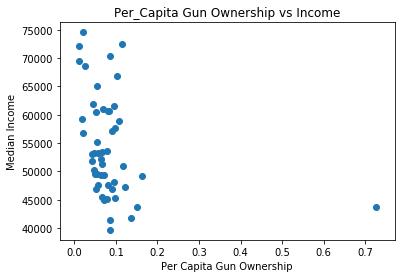

In [40]:
# Plot of per_capita ownership and per income
plt.scatter(df_comb_sub['per_capita'], df_comb_sub['income'])
plt.xlabel('Per Capita Gun Ownership')
plt.ylabel('Median Income')
plt.title('Per_Capita Gun Ownership vs Income')

In [41]:
""" The chart shows that per capita ownership is negatively correlated with rising income. However, the relationship is weak. """

' The chart shows that per capita ownership is negatively correlated with rising income. However, the relationship is weak. '

In [43]:
# Create a small formula to find out grown trends in the last 5 years. Found out the min and the max

df_pivot['CAGR5'] = ((df_pivot[2017]/df_pivot[2012])**(1/10) -1)*100
df_pivot.reset_index
df_pivot[df_pivot['CAGR5'] == df_pivot['CAGR5'].max()]['CAGR5'] # Looks like Mariana Islands had the highest 5 year CAGR in Gun Totals
df_pivot[df_pivot['CAGR5'] == df_pivot['CAGR5'].min()]['CAGR5'] # Hawaii has the lowest growth rate in 5 years in CAGR
df_pivot['CAGR5'].mean()

-1.0573085425026951

Text(0.5,1,'Growth in Gun Ownership versus Employment')

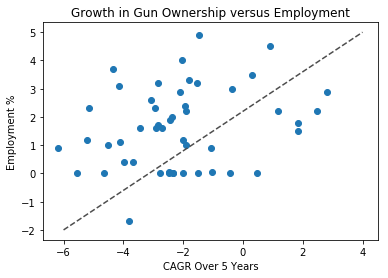

In [44]:
# Here is a plot between gun ownership growth rate and employment.
plt.scatter(df_pivot['CAGR5'], df_comb_sub['employment'])
plt.xlabel('CAGR Over 5 Years')
plt.ylabel('Employment %')
plt.plot([-6, 4], [-2, 5], ls="--", c=".3")
plt.title('Growth in Gun Ownership versus Employment')


In [45]:
""" The chart above shows Employment rate vs Growth in gun ownership. There seems to be a broad spread of data on both the positiven and negative side of the diagonal. 
This would suggest a weak relationship. Ideally, the changes in employment rate over time would be better to plot. However this type of data was not available in the data sources I selected. """

' The chart above shows Employment rate vs Growth in gun ownership. There seems to be a broad spread of data on both the positiven and negative side of the diagonal. \nThis would suggest a weak relationship. Ideally, the changes in employment rate over time would be better to plot. However this type of data was not available in the data sources I selected. '

<a id='conclusions'></a>
## Conclusions

> **Tip**: The Summary of my findings are as follows:

1. Gun Ownership in United States has grown quite significantly since 1998 and has only slighlty come donw in last two years. This results in the last 5 year overall CAGR of -1.05% - as the mood in US has changed as a result of mass shootings 
2. Most states have experinced a positive growth rate. Although there is significant variability
3. Gun ownership is positively correlated with population and negatively correlated with income
4. There is a negtiative correlation between percapita gun ownership and median incomeg
5. There is a positive correlation between growth in gun ownership and employment %
6. In most states have less than 500,000 guns but there some outliers where there are 3X the number of guns in those states
7. Kentucky has the highest percapita and New Jersey has the lowest per capita gun ownership. 

Limitations: All analysis is based on 2015 gun ownership data as the population data over time was not available or limited.
Also I would liked to run a regression, but further data wrangling was necessary to create a linear regression model.

Ideally, I would liked to study gun ownership and death due to shootings, however the census data did not have this information. I could have obtained this from other sources but due to time constrainst unable to do.

Finally, I would have to liked to income and employment data over time. 



> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255